In [45]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Michael Triner 16 October 2018

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Null: There is an equal chance of determining tea or milk first
ALT: The lady is actually better at determining tea or milk first

Step 2: Test the difference of correct guesses to incorrect guesses

Step 3: Determine distribution of test statistic and p-value

p-value below ugly red box with the warnings


C:\Users\C19Michael.Triner\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.1374

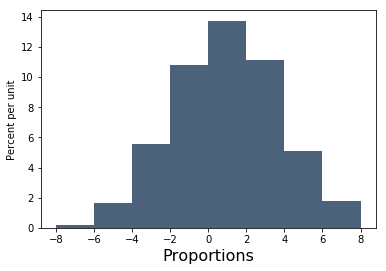

In [47]:
proportions = []
for i in np.arange(10000):
    
    random_sample = Table().with_columns('Guess Correctness',['Yes','No'],'Number of',sample_proportions(8,[.50,.50])*8)
    numbs = random_sample.column(1)
    proportions = np.append(proportions,numbs.item(0)-numbs.item(1))
prop_table = Table().with_column('Proportions',proportions)
prop_table.hist(bins = 8)
print('p-value below ugly red box with the warnings')
np.count_nonzero(proportions >= (4))/10000

Step 4: Conclude that we fail to reject the null hypothesis, the p-value is not statistically significant

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [20]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null: Because of the sample, Versicolor has an equal chance of having a larger sepal width
ALT: virginica has a larger mean sepal width

Step 2: Test statistic, difference of virginica sepal width and versicolor sepal width

Step 3: p-value and distributiion under Null

In [23]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [35]:
shuffled_widths = iris_sub.sample(with_replacement = False).column(1)
with_shuffled = iris_sub.with_column('Shuffled Widths',shuffled_widths)
with_shuffled.group(0,np.mean)

species,sepal_width mean,Shuffled Widths mean
versicolor,2.77,2.952
virginica,2.974,2.792


p-value below ugly red box with the warnings


C:\Users\C19Michael.Triner\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.001

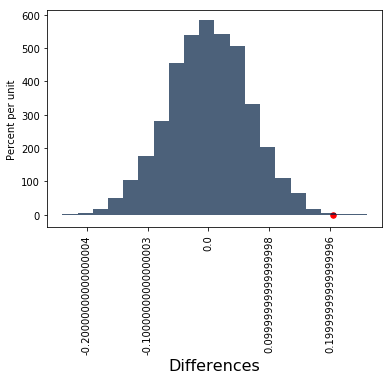

In [46]:
diffs = []
for i in np.arange(10000):
    shuffled_widths = iris_sub.sample(with_replacement = False).column(1)
    with_shuffled = iris_sub.with_column('Shuffled Widths',shuffled_widths)
    diffs = np.append(diffs,with_shuffled.group(0,np.mean).column(2).item(1)-with_shuffled.group(0,np.mean).column(2).item(0))
    
diff_table = Table().with_column('Differences',diffs)
diff_table.hist(bins = 20)
plt.scatter(obs, 0, color='red', s=30)
print('p-value below ugly red box with the warnings')
np.count_nonzero(diffs >= (obs))/10000


Step 4: p-value is statistically significant and we accept the null hypothesis.